In [1]:
# 라이브러리 추가
import numpy as np
import pandas as pd
import re
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# 키워드
df = pd.read_excel('D:/GEODATA/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df[['위치']].to_csv('D:/GEODATA/bigkinds.txt', index=False, header=False)
f = open("D:/GEODATA/bigkinds.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [4]:
# 단어 2차원 리스트
word = []
for i in range(len(lines)):
    word.append(kkma.nouns(lines[i]))
word = [[y for y in x if not len(y)==1] for x in word]   # 2자 이상 
word = [[y for y in x if not y.isdigit()] for x in word] # 숫자판별

In [5]:
# 단어 1차원 리스트 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

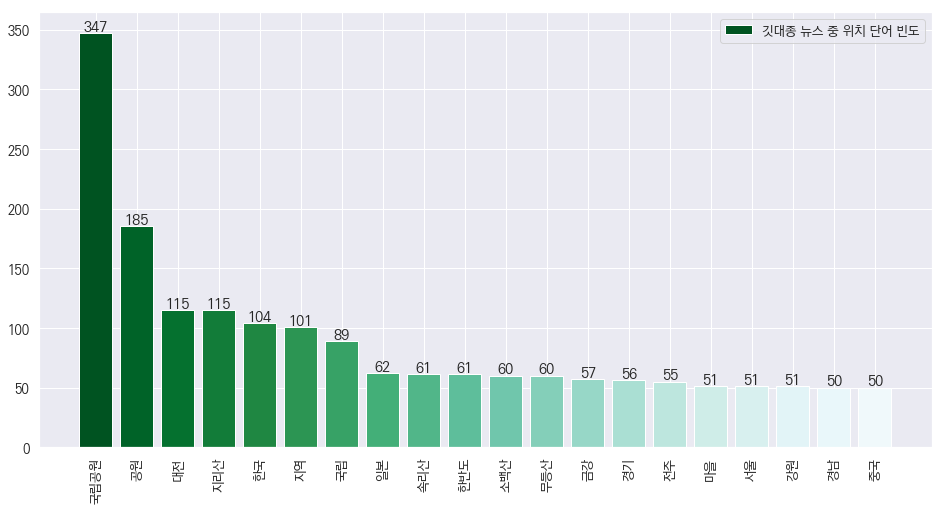

In [6]:
# 단어빈도
df = pd.DataFrame({'단어':flatten(word)})
value_counts = df['단어'].value_counts(dropna=True, sort=True)
df = pd.DataFrame(value_counts).reset_index()
df.columns = ['단어', '빈도']
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
f, ax = plt.subplots(figsize=(16, 8))
plot = ax.bar(df[:20]['단어'], df[:20]['빈도'], color=sns.color_palette("BuGn_r", df[:20]['단어'].size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticklabels(df[:20]['단어'], rotation='vertical') 
plt.legend(labels=['깃대종 뉴스 중 위치 단어 빈도'], loc='upper right')
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

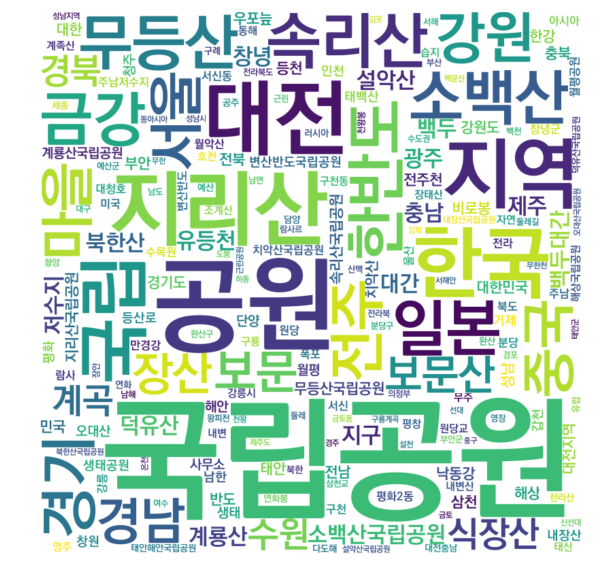

In [7]:
# 위치 단어구름
from wordcloud import WordCloud
from collections import Counter

font_path = 'c:/Windows/Fonts/KoPubDotumBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(flatten(word))

stopwords = ["깃대종", "깃대"]
[count.pop(stopword) for stopword in stopwords]

wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')
plt.show()

In [10]:
# 어프라이어리(Apriori)
from apyori import apriori
# 지지도(support): P(A∩B)
result=(list(apriori(word, min_support=0.02)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
                  (df['support'] >= 0.02)].sort_values(by='support', ascending=False)
df.head(20)

,items,support,ordered_statistics,length
88,"(국립공원, 공원)",0.088435,"[((공원), (국립공원), 0.4918918918918919, 1.45866500...",2
94,"(국립, 국립공원)",0.073858,"[((국립), (국립공원), 0.8539325842696628, 2.53226694...",2
87,"(국립, 공원)",0.073858,"[((공원), (국립), 0.4108108108108108, 4.7497115092...",2
112,"(지리산, 국립공원)",0.057337,"[((국립공원), (지리산), 0.17002881844380402, 1.521388...",2
108,"(소백산, 국립공원)",0.046647,"[((국립공원), (소백산), 0.13832853025936598, 2.372334...",2
141,"(보문, 보문산)",0.040816,"[((보문), (보문산), 0.9767441860465115, 23.93023255...",2
157,"(장산, 식장산)",0.040816,"[((식장산), (장산), 1.0, 23.930232558139533), ((장산)...",2
109,"(소백산국립공원, 국립공원)",0.039845,"[((국립공원), (소백산국립공원), 0.11815561959654178, 2.96...",2
110,"(속리산, 국립공원)",0.039845,"[((국립공원), (속리산), 0.11815561959654178, 2.171109...",2
154,"(소백산국립공원, 소백산)",0.039845,"[((소백산), (소백산국립공원), 0.6833333333333333, 17.150...",2


In [11]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

# 레이아웃
# pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.bipartite_layout(G)
# pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)

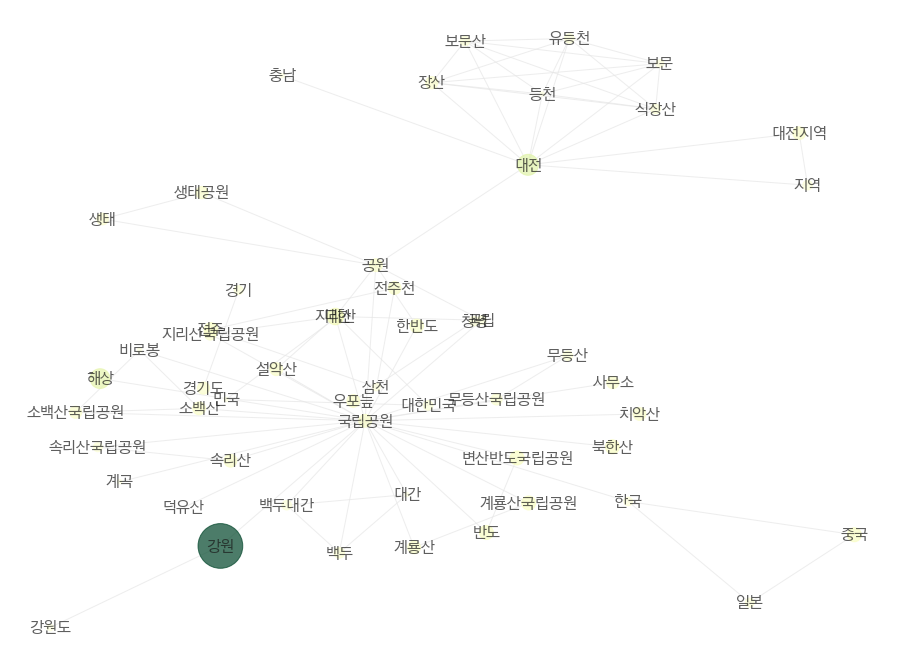

In [13]:
# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.9', cmap=plt.cm.YlGn)
plt.savefig('D:/GEODATA/IMG03.png', bbox_inches='tight')